In [727]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Edge Detection using difference of Gaussians

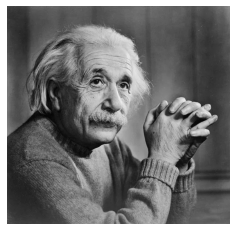

In [728]:
albert = cv2.imread('media/einstein.jpg')
plt.axis('off')
plt.imshow(albert)

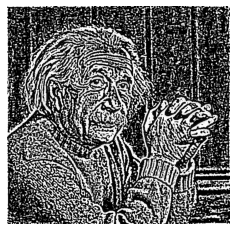

In [729]:
albert_five = cv2.GaussianBlur(albert, (5, 5), cv2.BORDER_DEFAULT)
albert_nine = cv2.GaussianBlur(albert, (9, 9), cv2.BORDER_DEFAULT)
albert_edge = albert_nine - albert_five
plt.axis('off')
plt.imshow(albert_edge)

# 2. Template Matching using Histograms

In [730]:
import numpy as np

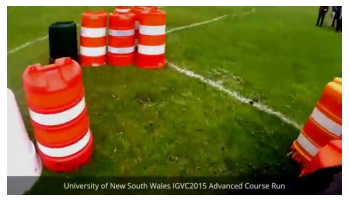

In [731]:
vid = cv2.VideoCapture('media/videoplayback.mp4')
vid.set(cv2.CAP_PROP_POS_MSEC, 29000)
_, frame = vid.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

plt.axis('off')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_HSV2RGB))

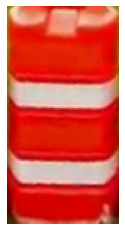

In [732]:
barrel = cv2.imread('media/barrel.png')
barrel = cv2.cvtColor(barrel, cv2.COLOR_BGR2HSV)
plt.axis('off')
plt.imshow(cv2.cvtColor(barrel, cv2.COLOR_HSV2RGB))

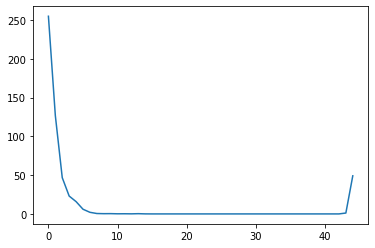

In [863]:
hist = cv2.calcHist([barrel], [0], None, [45], [0, 180])
norm = cv2.normalize(hist, None, 0, 255, cv2.NORM_MINMAX)
plt.plot(norm)

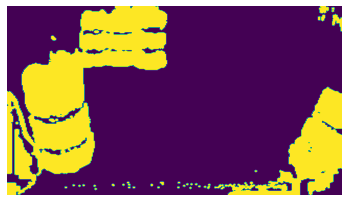

In [864]:
_, norm = cv2.threshold(norm, 32, 255, cv2.THRESH_BINARY)
res = cv2.calcBackProject([frame], [0], norm, [0, 180], 1)
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
plt.axis('off')
plt.imshow(cv2.filter2D(res, -1, disc, res))

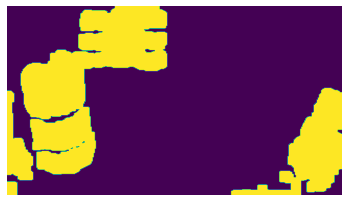

In [866]:
thresh = cv2.erode(res, np.ones((5, 5)), iterations=3)
thresh = cv2.dilate(thresh, np.ones((5, 5)), iterations=3)
plt.axis('off')
plt.imshow(cv2.filter2D(thresh, -1, disc, thresh))

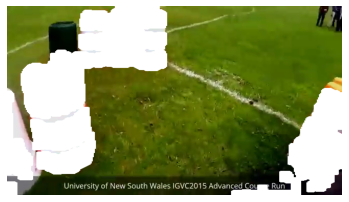

In [867]:
final = cv2.merge((thresh, thresh, thresh))
plt.axis('off')
plt.imshow(cv2.bitwise_or(cv2.cvtColor(frame, cv2.COLOR_HSV2RGB), final))

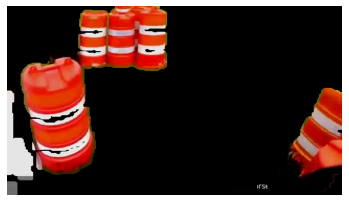

In [868]:
plt.axis('off')
plt.imshow(cv2.bitwise_and(cv2.cvtColor(frame, cv2.COLOR_HSV2RGB), final))

Thus, the red barrels have been extracted from the image!
Let's try for the white lines now

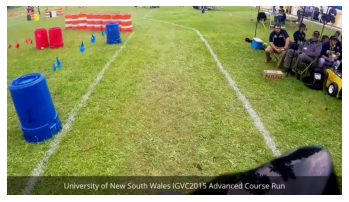

In [949]:
vid.set(cv2.CAP_PROP_POS_MSEC, 1200)
_, frame2 = vid.read()
frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2HSV)

plt.axis('off')
plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_HSV2RGB))

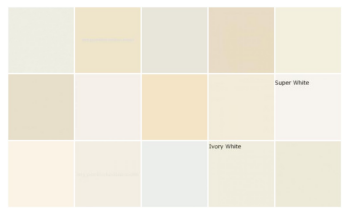

In [950]:
whites = cv2.imread('media/whites.jpg') # using random online image as video barely had enough white
whites = cv2.cvtColor(whites, cv2.COLOR_BGR2HSV)
plt.axis('off')
plt.imshow(cv2.cvtColor(whites, cv2.COLOR_HSV2RGB))

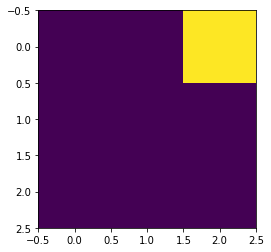

In [962]:
hist_white = cv2.calcHist([whites], [1, 2], None, [3, 3], [0, 256, 0, 256])
norm_white = cv2.normalize(hist_white, None, 256, cv2.NORM_MINMAX)
plt.imshow(norm_white)

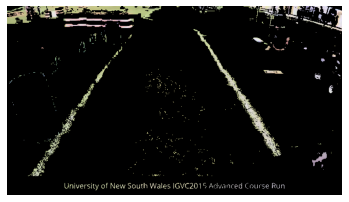

In [967]:
_, norm_white = cv2.threshold(norm_white, 128, 255, cv2.THRESH_BINARY)
res_white = cv2.calcBackProject([frame2], [1, 2], norm_white, [0, 256, 0, 256], 1)

final_white = cv2.merge((res_white, res_white, res_white))
plt.axis('off')
plt.imshow(cv2.bitwise_and(cv2.cvtColor(frame2, cv2.COLOR_HSV2RGB), final_white))

Even though there were many elements in the image, we still managed to somewhat extract the white lines.